In [2]:
%matplotlib inline
# %matplotlib notebook
import simplyP as sp

In [3]:
# Path to the Excel file containing parameters for setup and all the model parameters
params_fpath = (r'C:\Data\GitHub\SimplyP\Development\v0-2\Parameters_working.xlsx')

# Plotting options: either 'paper' or 'notebook'
fig_display_type = 'notebook'

In [4]:
# Read inputs
p_SU, dynamic_options, p, p_LU, p_SC, p_struc, met_df, obs_dict = sp.read_input_data(params_fpath)

Parameter values successfully read in
Input meteorological data read in
Snow accumulation and melt module run to estimate snowmelt inputs to the soil
PET estimated using the Thornthwaite method
Observed water chemistry data read in


In [5]:
%%time
# Run model
df_TC_dict, df_R_dict, Kf, ode_output_dict = sp.run_simply_p(met_df, p_struc, p_SU, p_LU,
                                                             p_SC, p, dynamic_options)

Starting model run for sub-catchment: 1
No reaches directly upstream of this reach
Finished!

Starting model run for sub-catchment: 2
No reaches directly upstream of this reach
Finished!

Starting model run for sub-catchment: 3
No reaches directly upstream of this reach
Finished!

Kf (the soil P sorption coefficient; mm/kg): 1.1e-05

Results saved to csv

Wall time: 18.1 s


### 4. Explore model results

The following code cells summarise the model output graphically and, if there are observations, calculates goodness-of-fit statistics. If you opted to save graphs in the setup sheet in the parameter file, then these will be saved to file.

#### 4.1. Results from snow module

This plot is only really relevant if it was called during the model run (i.e. `inc_snowmelt=='y'` in the setup sheet in the Excel parameter file). Otherwise, it will just plot the input meteorology data (and PET, if this was calculated by the model rather than being read in).

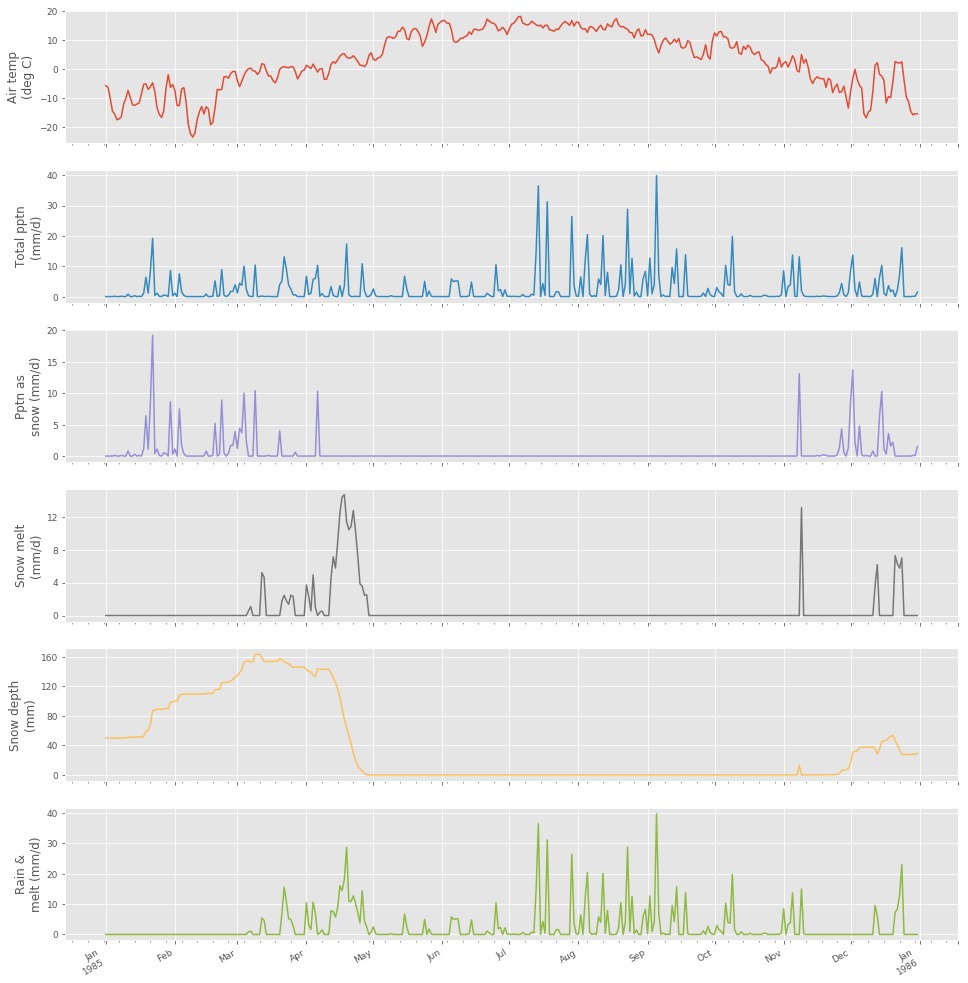

In [6]:
# Plot snowfall/melt
sp.plot_snow(met_df, p_SU, fig_display_type)

#### 4.2. Results from terrestrial processing

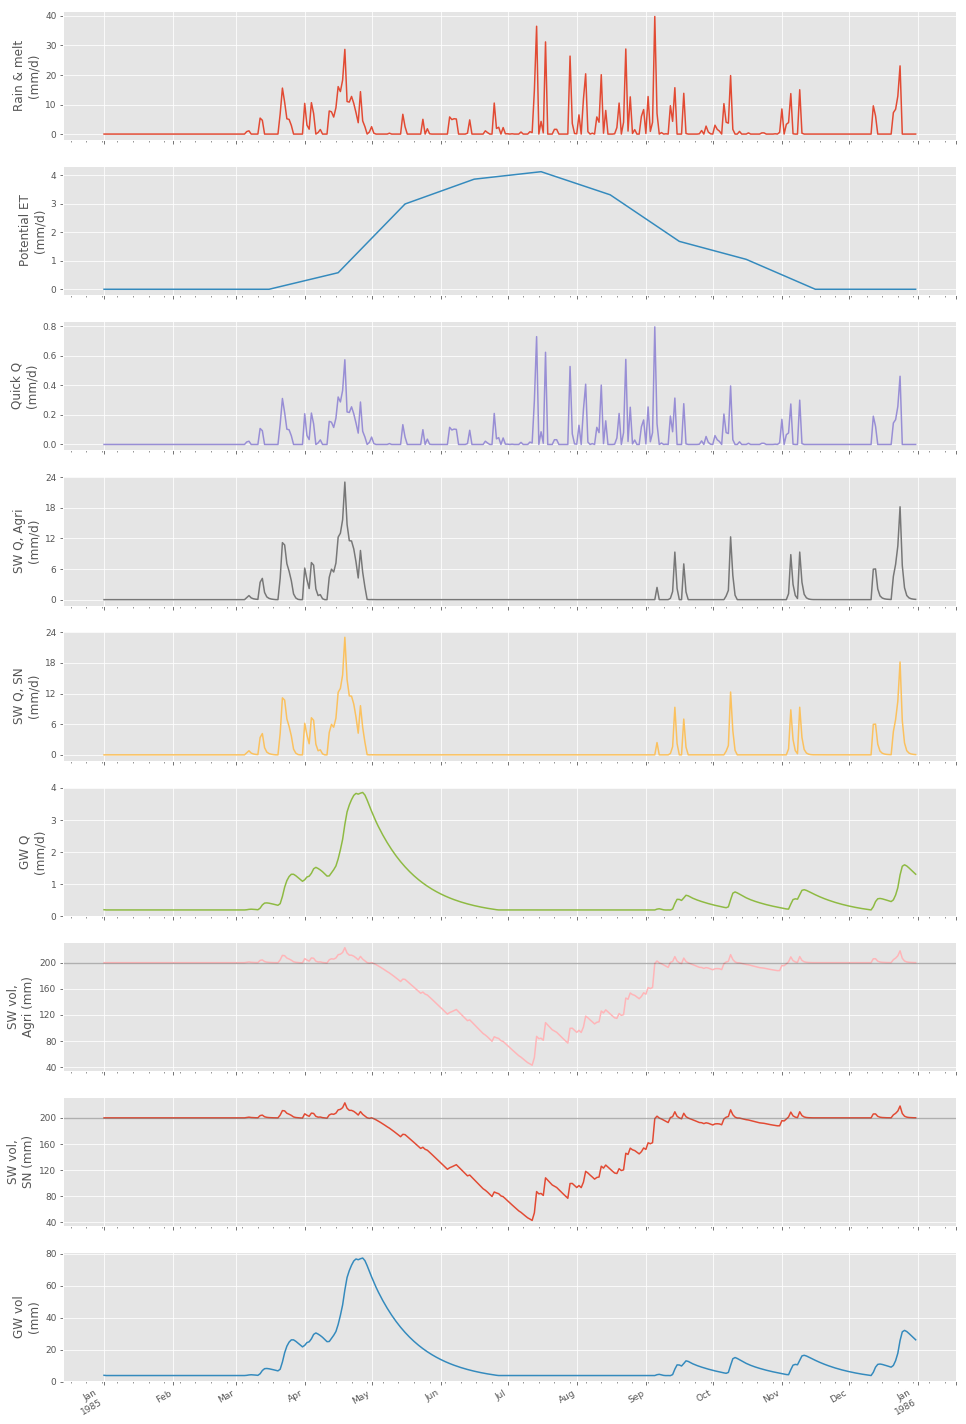

In [7]:
# Plot terrestrial
sp.plot_terrestrial(p_SU, p_SC, p, df_TC_dict, met_df, fig_display_type)

In [ ]:
# Just plot soil water and groundwater flow
df_TC_dict[1][['QsA','Qg']].plot(subplots=True)

#### 4.3. Instream results

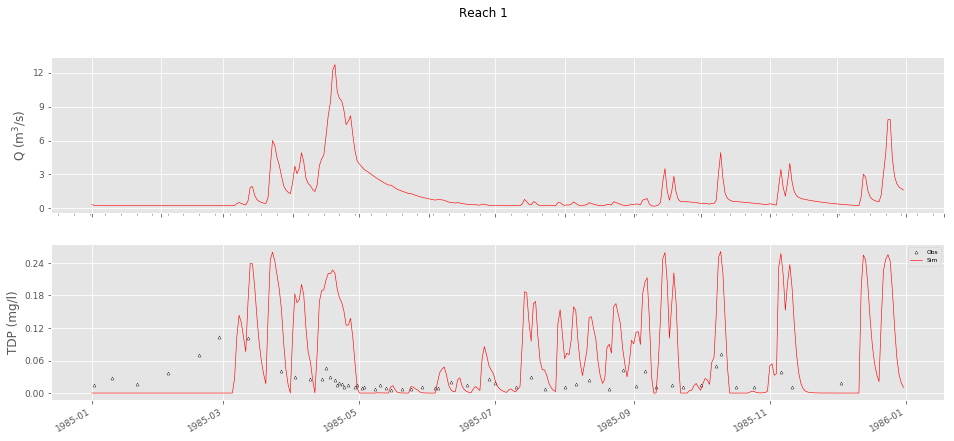

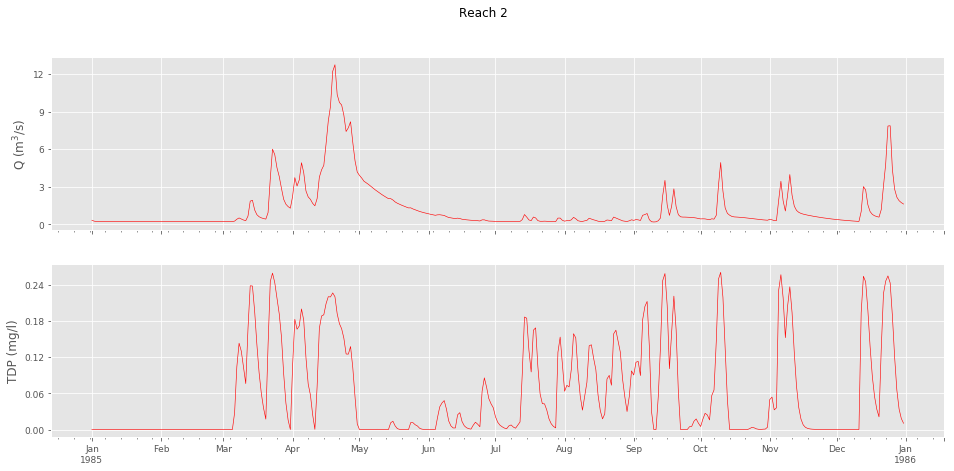

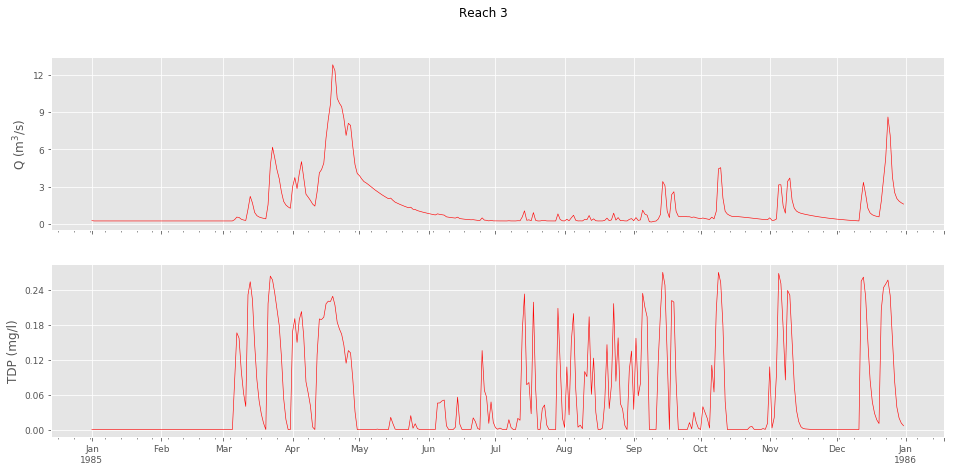

In [8]:
# Plot in-stream
# N.B. if you selected a log scale, you may get a warning if any of the simulated values are close to 0.
sp.plot_in_stream(p_SU, obs_dict, df_R_dict, fig_display_type)

#### 4.4. Calculate goodness-of-fit statistics

Statistics only calculated for reaches and parameters which have more than 10 observations.

In [ ]:
# GoF summary
gof_stats = sp.goodness_of_fit_stats(p_SU, df_R_dict, obs_dict)
gof_stats

### 5. Calculate summed inputs to a downstream waterbody (e.g. a lake or an estuary)

Sub-catchments flowing directly into receiving waterbody: [2 3]
Graph saved to file
Results saved to csv


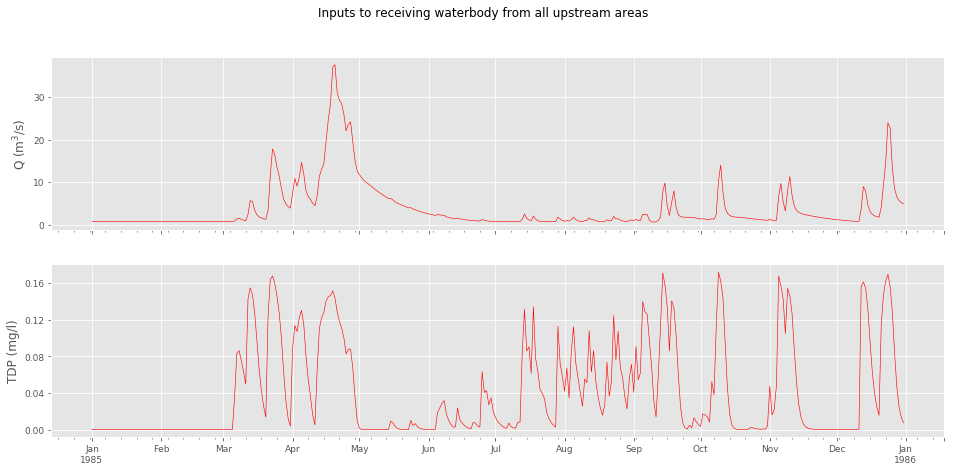

In [6]:
# Sum discharges and masses from reaches directly upstream, and calculate
# in-stream concentrations
df_summed = sp.sum_to_waterbody(p_struc, p_SU['n_SC'], df_R_dict, p['f_TDP'])

# Plot results and save to csv if parameter 'save_output_csvs' set to 'y' in
# parameter 'Setup' sheet
sp.plot_instream_summed(p_SU, df_summed, fig_display_type)

In [13]:
p['SC_list']

array([1, 2, 3])